# World Bank Population Data Analysis Project

# Objective

The primary objective of this project is to conduct a comprehensive exploratory data analysis (EDA) on the World Bank dataset spanning from 1960 to 2022, focusing on country-level information, regional patterns, and income group classifications. Through this analysis, we aim to uncover key insights, trends, and correlations within the population data, providing a deeper understanding of demographic dynamics and facilitating informed decision-making for various stakeholders.

# Importing all the necessary libraries for analysis

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [2]:
# in the primary dataframe csv file first 4 lines do not contain data and only mentions information related to data
# that leads to error in loading the data with pandas using pd.read_csv
# the dataframe starts from 5th line, therefore we have skipped 4 rows and "header= 0" indicates the 5th line to be considered header
df= pd.read_csv('d:\ProdigyInfoTech Projects\World Bank Data Set\API_SP.POP.TOTL_DS2_en_csv_v2_85\WorldBank_Dataset.csv',skiprows=4, header=0)
metadata1= pd.read_csv('d:\ProdigyInfoTech Projects\World Bank Data Set\API_SP.POP.TOTL_DS2_en_csv_v2_85\Metadata_Country.csv')
metadata2 = pd.read_csv('d:\ProdigyInfoTech Projects\World Bank Data Set\API_SP.POP.TOTL_DS2_en_csv_v2_85\Metadata_Indicator.csv')

In [3]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [5]:
metadata1.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [6]:
metadata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   SpecialNotes  126 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.6+ KB


In [7]:
metadata2.head()

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...,NaN


# Data Cleaning and Merging Dataframes to create a Consolidated Dataframe for EDA

In [3]:
merged_df = pd.merge(df, metadata1, on= 'Country Code', how='left')

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 73 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [10]:
pd.isnull(merged_df).sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                2
                 ... 
Region             49
IncomeGroup        50
SpecialNotes      140
TableName           1
Unnamed: 5        266
Length: 73, dtype: int64

We have Regions and Income Groups where around 20% null values are present, but these are crucial parameters so will not handle these null values in special manner or we will not delete them either. We will consider them as categorical variables and yield the results associated with these parameters across various years

We will delete unnecessary columns from the dataframe

In [4]:
merged_df.drop(['Indicator Name','Indicator Code','Country Code','TableName','SpecialNotes','Unnamed: 5','Unnamed: 67'], axis=1, inplace=True)

In [12]:
pd.set_option('display.max_columns',None)
merged_df.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Region,IncomeGroup
0,Aruba,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,59330.0,59106.0,58816.0,58855.0,59365.0,60028.0,60715.0,61193.0,61465.0,61738.0,62006.0,62267.0,62614.0,63116.0,63683.0,64174.0,64478.0,64553.0,64450.0,64332.0,64596.0,65712.0,67864.0,70192.0,72360.0,74710.0,77050.0,79417.0,81858.0,84355.0,86867.0,89101.0,90691.0,91781.0,92701.0,93540.0,94483.0,95606.0,96787.0,97996.0,99212.0,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,Latin America & Caribbean,High income
1,Africa Eastern and Southern,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,167596160.0,172475766.0,177503186.0,182599092.0,187901657.0,193512956.0,199284304.0,205202669.0,211120911.0,217481420.0,224315978.0,230967858.0,237937461.0,245386717.0,252779730.0,260209149.0,267938123.0,276035920.0,284490394.0,292795186.0,301124880.0,309890664.0,318544083.0,326933522.0,335625136.0,344418362.0,353466601.0,362985802.0,372352230.0,381715600.0,391486231.0,401600588.0,412001885.0,422741118.0,433807484.0,445281555.0,457153837.0,469508516.0,482406426.0,495748900.0,509410477.0,523459657.0,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN,NaN
2,Afghanistan,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,10494489.0,10752971.0,11015857.0,11286753.0,11575305.0,11869879.0,12157386.0,12425267.0,12687301.0,12938862.0,12986369.0,12486631.0,11155195.0,10088289.0,9951449.0,10243686.0,10512221.0,10448442.0,10322758.0,10383460.0,10673168.0,10694796.0,10745167.0,12057433.0,14003760.0,15455555.0,16418912.0,17106595.0,17788819.0,18493132.0,19262847.0,19542982.0,19688632.0,21000256.0,22645130.0,23553551.0,24411191.0,25442944.0,25903301.0,26427199.0,27385307.0,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,South Asia,Low income
3,Africa Western and Central,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,118615741.0,121424797.0,124336039.0,127364044.0,130563107.0,133953892.0,137548613.0,141258400.0,145122851.0,149206663.0,153459665.0,157825609.0,162323313.0,167023385.0,171566640.0,176054495.0,180817312.0,185720244.0,190759952.0,195969722.0,201392200.0,206739024.0,212172888.0,217966101.0,223788766.0,229675775.0,235861484.0,242200260.0,248713095.0,255482918.0,262397030.0,269611898.0,277160097.0,284952322.0,292977949.0,301265247.0,309824829.0,318601484.0,327612838.0,336893835.0,346475221.0,356337762.0,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN,NaN
4,Angola,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,5928386.0,6029700.0,6177049.0,6364731.0,6578230.0,6802494.0,7032713.0,7266780.0,7511895.0,7771590.0,8043218.0,8330047.0,8631457.0,8947152.0,9276707.0,9617702.0,9970621.0,10332574.0,10694057.0,11060261.0,11439498.0,11828638.0,12228691.0,12632507.0,13038270.0,13462031.0,13912253.0,14383350.0,14871146.0,15366864.0,15870753.0,16394062.0,16941587.0,17516139.0,18124342.0,18771125.0,19450959.0,20162340.0,20909684.0,21691522.0,22507674.0,23364185.0,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,Sub-Saharan Africa,Lower middle income


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   1960          264 non-null    float64
 2   1961          264 non-null    float64
 3   1962          264 non-null    float64
 4   1963          264 non-null    float64
 5   1964          264 non-null    float64
 6   1965          264 non-null    float64
 7   1966          264 non-null    float64
 8   1967          264 non-null    float64
 9   1968          264 non-null    float64
 10  1969          264 non-null    float64
 11  1970          264 non-null    float64
 12  1971          264 non-null    float64
 13  1972          264 non-null    float64
 14  1973          264 non-null    float64
 15  1974          264 non-null    float64
 16  1975          264 non-null    float64
 17  1976          264 non-null    float64
 18  1977          264 non-null    

In [14]:
merged_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02
mean,1.172712e+08,1.188807e+08,1.210511e+08,1.237333e+08,1.264378e+08,1.291813e+08,1.320404e+08,1.348980e+08,1.378358e+08,1.408789e+08,1.439693e+08,1.471163e+08,1.502115e+08,1.533501e+08,1.564755e+08,1.595368e+08,1.625684e+08,1.655894e+08,1.686657e+08,1.718262e+08,1.750146e+08,1.782819e+08,1.817011e+08,1.851494e+08,1.885888e+08,1.921012e+08,1.957174e+08,1.994330e+08,2.031770e+08,2.069199e+08,2.099328e+08,2.136433e+08,2.172983e+08,2.209322e+08,2.245370e+08,2.281148e+08,2.316931e+08,2.352589e+08,2.388003e+08,2.423083e+08,2.457971e+08,2.492933e+08,2.527993e+08,2.563022e+08,2.598113e+08,2.633373e+08,2.668790e+08,2.704142e+08,2.740132e+08,2.776571e+08,2.813360e+08,2.850474e+08,2.888850e+08,2.927593e+08,2.966353e+08,3.004815e+08,3.043263e+08,3.081770e+08,3.119641e+08,3.156701e+08,3.192595e+08,3.225221e+08,3.254733e+08
std,3.695439e+08,3.740897e+08,3.808061e+08,3.895039e+08,3.982439e+08,4.071153e+08,4.164504e+08,4.257424e+08,4.353218e+08,4.452927e+08,4.554526e+08,4.657873e+08,4.759053e+08,4.861101e+08,4.962021e+08,5.059973e+08,5.156410e+08,5.252074e+08,5.349185e+08,5.448637e+08,5.549502e+08,5.653541e+08,5.762653e+08,5.872564e+08,5.981936e+08,6.093671e+08,6.209099e+08,6.327995e+08,6.447975e+08,6.567363e+08,6.676773e+08,6.794607e+08,6.909190e+08,7.022215e+08,7.134497e+08,7.245981e+08,7.357488e+08,7.468693e+08,7.578820e+08,7.687054e+08,7.794213e+08,7.901104e+08,8.006986e+08,8.111969e+08,8.216948e+08,8.321853e+08,8.426182e+08,8.529608e+08,8.634662e+08,8.741060e+08,8.848707e+08,8.958532e+08,9.071954e+08,9.186237e+08,9.300118e+08,9.412522e+08,9.524238e+08,9.636041e+08,9.744884e+08,9.850405e+08,9.951225e+08,1.004225e+09,1.012163e+09
min,2.646000e+03,2.888000e+03,3.171000e+03,3.481000e+03,3.811000e+03,4.161000e+03,4.531000e+03,4.930000e+03,5.354000e+03,5.646000e+03,5.665000e+03,5.742000e+03,5.891000e+03,5.934000e+03,6.100000e+03,6.381000e+03,6.668000e+03,6.885000e+03,7.110000e+03,7.332000e+03,7.598000e+03,7.691000e+03,7.672000e+03,7.832000e+03,8.125000e+03,8.313000e+03,8.496000e+03,8.665000e+03,8.844000e+03,9.017000e+03,9.182000e+03,9.354000e+03,9.466000e+03,9.517000e+03,9.559000e+03,9.585000e+03,9.611000e+03,9.630000e+03,9.634000e+03,9.640000e+03,9.638000e+03,9.621000e+03,9.609000e+03,9.668000e+03,9.791000e+03,9.912000e+03,1.003000e+04,1.014900e+04,1.024300e+04,1.023300e+04,1.024100e+04,1.028300e+04,1.044400e+04,1.069400e+04,1.089900e+04,1.087700e+04,1.085200e+04,1.082800e+04,1.086500e+04,1.095600e+04,1.106900e+04,1.120400e+04,1.131200e+04
25%,5.132212e+05,5.231345e+05,5.337595e+05,5.449288e+05,5.566630e+05,5.651150e+05,5.691470e+05,5.773872e+05,5.832700e+05,5.875942e+05,5.959550e+05,6.083045e+05,6.255230e+05,6.468508e+05,6.488378e+05,6.624138e+05,6.954270e+05,7.366562e+05,7.878982e+05,8.098190e+05,8.181405e+05,8.286392e+05,8.413688e+05,8.570700e+05,8.730118e+05,8.891865e+05,9.078365e+05,9.272845e+05,9.563978e+05,9.893588

In [11]:
merged_df.describe(include='object')

,Country Name,Region,IncomeGroup
count,266,217,216
unique,266,7,4
top,Aruba,Europe & Central Asia,High income
freq,1,58,82


# Outliers

In population data Outliers exist because it is genuine reflections of unique circumstances or events in specific countries rather than data errors. So checking outliers for various years does not make sense here.

But we will find the z scores of all the countries, row wise, by transposing the data to check the growth trend of countries year on year basis, to filter out those countries which have z scores above 3 

In [17]:
# function to detect outliers row wise for countries to filter out countries which show anomaly in growth
from scipy import stats
from scipy.stats import zscore
def detect_outliers_zscore(merged_df, threshold=3):
    numeric_columns = merged_df.select_dtypes(include=[np.number]).columns   #Choosing only numeric columns
    numeric_data= merged_df[numeric_columns].T
    z_scores = np.abs(stats.zscore(numeric_data,axis=0))
    outliers = (z_scores>threshold).any(axis=0)
    return outliers, z_scores.T

# detect outliers in dataframe
outliers, z_scores = detect_outliers_zscore(merged_df)

# Display rows with outliers
outliers_df= merged_df[outliers]
print('Rows with Outliers:')
print(outliers_df)


Rows with Outliers:
    Country Name        1960        1961        1962        1963        1964  \
57      Dominica     59379.0     60395.0     61224.0     62031.0     62843.0   
94        Guyana    571990.0    588597.0    604833.0    620703.0    635957.0   
248      Ukraine  42767251.0  43365219.0  43924755.0  44445903.0  44941406.0   

           1965        1966        1967        1968  ...        2015  \
57      63744.0     64728.0     65760.0     66865.0  ...     70007.0   
94     650207.0    663241.0    675064.0    685887.0  ...    755031.0   
248  45387091.0  45809120.0  46235370.0  46635196.0  ...  45154036.0   

           2016        2017        2018        2019        2020        2021  \
57      70075.0     70403.0     70823.0     71428.0     71995.0     72412.0   
94     759087.0    763252.0    785514.0    798753.0    797202.0    804567.0   
248  45004673.0  44831135.0  44622518.0  44386203.0  44132049.0  43822901.0   

           2022                     Region          I

# Exploratory Data Analysis

Let's see these three countries which have shown different growth trend from rest of the countries

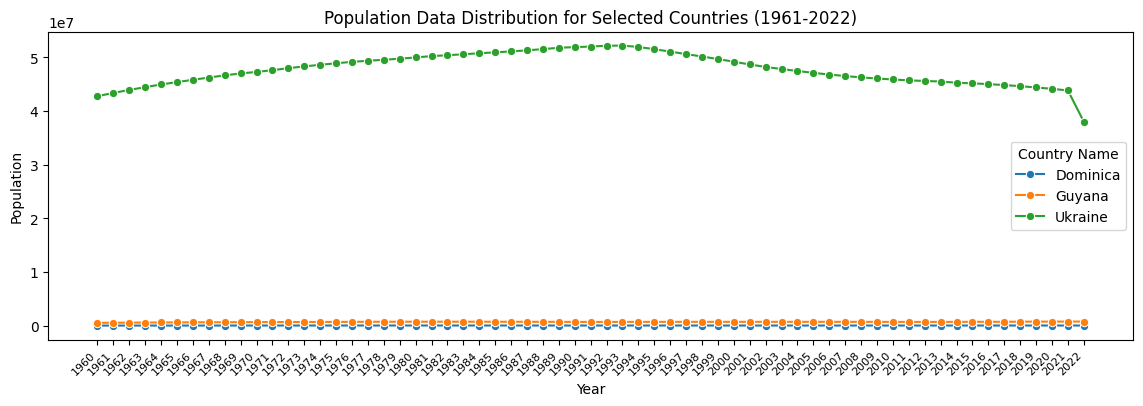

The graph clearly shows that Ukraine population is on decline, whereas in other two countries no significant
positive trend is being observed


In [10]:
# the three countries which have shown a different trend from rest of the countries
# with the help of z-scores, we have identified these countries and will now a plot a line graph for them to see its graph
columns_of_interest = ['Country Name'] + [str(year) for year in range(1960, 2023)]
data_subset = merged_df[columns_of_interest]

# Choose three countries for visualization
countries_to_plot = ['Dominica', 'Guyana', 'Ukraine']  

# Filter data for the selected countries
data_subset_countries = data_subset[data_subset['Country Name'].isin(countries_to_plot)]

# Melt the dataframe to convert it to a long format for plotting
melted_data = pd.melt(data_subset_countries, id_vars='Country Name', var_name='Year', value_name='Population')

# Create a line plot to visualize the data distribution for three countries
plt.figure(figsize=(14, 4))
sns.lineplot(x='Year', y='Population', hue='Country Name', data=melted_data, marker='o')
plt.title('Population Data Distribution for Selected Countries (1961-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right',fontsize=8)
plt.show()
print('''The graph clearly shows that Ukraine population is on decline, whereas in other two countries no significant
positive trend is being observed''')

Let's see world population growth trend since 1960

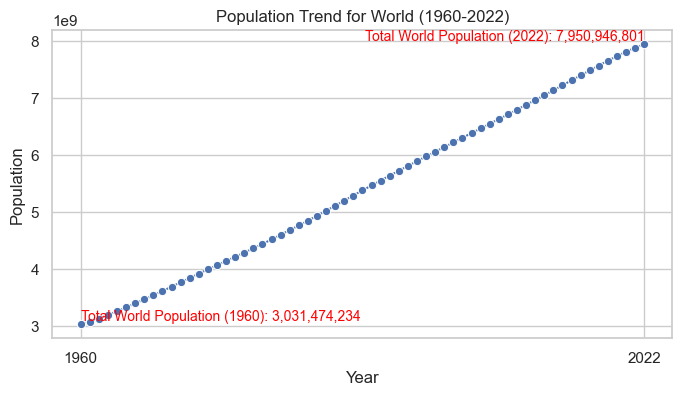

The population growth percentage from 1960 to 2022 is: 162.28%


In [20]:
target_country = 'World'  # Replace 'Your_Target_Country' with the actual country name

# Filter data for the target country
country_data = merged_df[merged_df['Country Name'] == target_country]

# Extract population figures for 1960 and 2022
population_1960 = country_data['1960'].values[0]
population_2022 = country_data['2022'].values[0]

# Extract years and corresponding population values
years = [str(year) for year in range(1960, 2023)]
population_values = country_data[years].values.flatten()

# Plotting the line plot
plt.figure(figsize=(8, 4))
sns.lineplot(x=years, y=population_values, marker='o', color='b')
plt.title(f'Population Trend for {target_country} (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks([years[0], years[-1]])  # Display only the start and last years on the x-axis

# Add total world population for 1960 as a text label
plt.text([years[0]], population_1960, f'Total World Population (1960): {population_1960:,.0f}',
         verticalalignment='bottom', horizontalalignment='left', color='red', fontsize=10)

# Add total world population for 2022 as a text label
plt.text(years[-1], population_2022, f'Total World Population (2022): {population_2022:,.0f}',
         verticalalignment='bottom', horizontalalignment='right', color='red',fontsize=10)
plt.grid(True)
plt.show()

growth_percentage_2022 = ((population_2022 - population_1960) / population_1960) * 100

# Print the growth percentage for the year 2022
print(f'The population growth percentage from 1960 to 2022 is: {growth_percentage_2022:.2f}%')

The above line chart shows a linear trend of population growth with consistency from 1960 to 1922

Now let's check the growth trends of various regions

In [23]:
# Let's find out which regions have shown highest and lowest population growth across the years
years_columns = merged_df.columns[merged_df.columns.str.isnumeric()]
grouped_df = merged_df.groupby('Region')[years_columns].sum()

# Calculate the percent growth for each region from 1960 to 2022
percent_growth = (grouped_df['2022'] - grouped_df['1960']) / grouped_df['1960'] * 100

# Find the region with the highest growth
most_grown_region = percent_growth.idxmax()
highest_growth_percent = percent_growth.max()

print(f"The region with the highest growth from 1960 to 2022 is {most_grown_region} "
      f"with a growth percentage of {highest_growth_percent:.2f}%.")

least_grown_region = percent_growth.idxmin()
lowest_growth_percent = percent_growth.min()

print(f"The region with the lowest growth from 1960 to 2022 is {least_grown_region} "
      f"with a growth percentage of {lowest_growth_percent:.2f}%.")

The region with the highest growth from 1960 to 2022 is Sub-Saharan Africa with a growth percentage of 431.34%.
The region with the lowest growth from 1960 to 2022 is Europe & Central Asia with a growth percentage of 38.14%.


Let's see these regions in line graphs

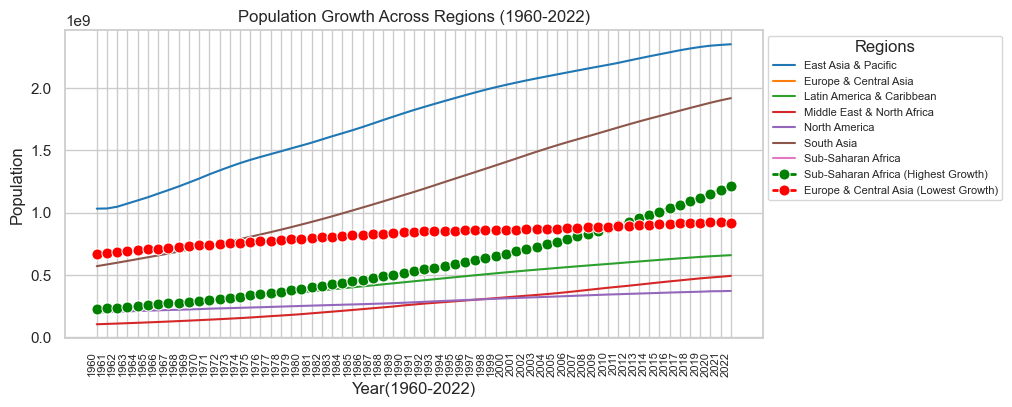

In [12]:
years_columns = merged_df.columns[merged_df.columns.str.isnumeric()]
grouped_df = merged_df.groupby('Region')[years_columns].sum()

# Transpose the DataFrame for easier plotting
grouped_df = grouped_df.transpose()

# Set Seaborn style
sns.set(style="whitegrid")

# Calculate the percent growth for each region from 1960 to 2022
percent_growth = (grouped_df.iloc[-1] - grouped_df.iloc[0]) / grouped_df.iloc[0] * 100

# Identify the region with the highest growth percentage
most_grown_region = percent_growth.idxmax()

# Identify the region with the lowest growth percentage
least_grown_region = percent_growth.idxmin()

# Plot population growth for each region over the years using a line plot
plt.figure(figsize=(9, 4))

# Plot all regions with a common style
sns.lineplot(data=grouped_df, palette="tab10", dashes=False)

# Highlight the highest growth region
sns.lineplot(data=grouped_df[most_grown_region], label=f'{most_grown_region} (Highest Growth)',
             linewidth=2, marker='o', markersize=8, color='green')

# Highlight the lowest growth region
sns.lineplot(data=grouped_df[least_grown_region], label=f'{least_grown_region} (Lowest Growth)',
             linewidth=2, marker='o', markersize=8, color='red')

plt.title('Population Growth Across Regions (1960-2022)')
plt.xlabel('Year(1960-2022)')
plt.ylabel('Population')
plt.legend(title='Regions', loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.show()

The region with the highest growth from 1960 to 2022 is Sub-Saharan Africa with a growth percentage of 431.34%.
The region with the lowest growth from 1960 to 2022 is Europe & Central Asia with a growth percentage of 38.14%.

Let's see population distribution across regions in 1960 and 2022 to compare the changes since 1960

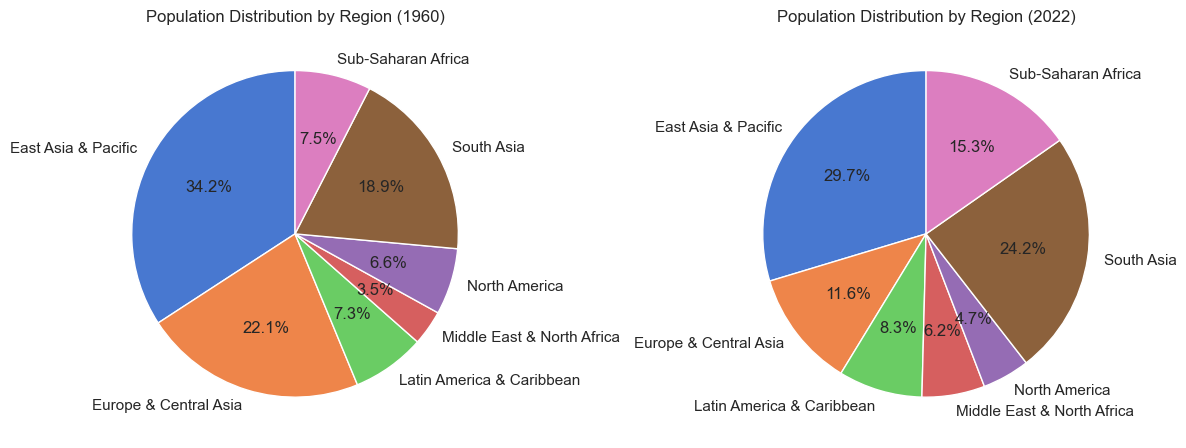

the pie charts show that in 1960 where East Asia and Pacific, Europe and Central asia used to hold more than 50 percent 
of the world population, in 2022 population in Europe and Central Asia shrunk and South Asia replaced Europe and central asia


In [8]:
# Population Distribution across regions
columns_of_interest = ['Region', '1960', '2022']
data_subset = merged_df[columns_of_interest]

# Melt the dataframe to convert it to a long format for plotting
melted_data = pd.melt(data_subset, id_vars='Region', var_name='Year', value_name='Population')

# Create separate pie charts for 1960 and 2022
plt.figure(figsize=(12, 6))

# Pie chart for 1960
plt.subplot(1, 2, 1)
population_1960 = melted_data[melted_data['Year'] == '1960'].groupby('Region')['Population'].sum()
plt.pie(population_1960, labels=population_1960.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
plt.title('Population Distribution by Region (1960)')

# Pie chart for 2022
plt.subplot(1, 2, 2)
population_2022 = melted_data[melted_data['Year'] == '2022'].groupby('Region')['Population'].sum()
plt.pie(population_2022, labels=population_2022.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
plt.title('Population Distribution by Region (2022)')

plt.tight_layout()
plt.show()

print('''the pie charts show that in 1960 where East Asia and Pacific, Europe and Central asia used to hold more than 50 percent 
of the world population, in 2022 population in Europe and Central Asia shrunk and South Asia replaced Europe and central asia''')

Now let's check the highest and lowest growing Income group in terms of population

In [14]:
# Let's find out which regions have shown highest and lowest population growth across the years
years_columns = merged_df.columns[merged_df.columns.str.isnumeric()]
grouped_df = merged_df.groupby('IncomeGroup')[years_columns].sum()

# Calculate the percent growth for each region from 1960 to 2022
percent_growth = (grouped_df['2022'] - grouped_df['1960']) / grouped_df['1960'] * 100

# Find the region with the highest growth
most_grown_region = percent_growth.idxmax()
highest_growth_percent = percent_growth.max()

print(f"The Income Group with the highest growth from 1960 to 2022 is '{most_grown_region}' group "
      f"with a growth percentage of {highest_growth_percent:.2f}%.")

least_grown_region = percent_growth.idxmin()
lowest_growth_percent = percent_growth.min()

print(f"The Income Group with the lowest growth from 1960 to 2022 is '{least_grown_region}' group "
      f"with a growth percentage of {lowest_growth_percent:.2f}%.")

The Income Group with the highest growth from 1960 to 2022 is 'Low income' group with a growth percentage of 418.35%.
The Income Group with the lowest growth from 1960 to 2022 is 'High income' group with a growth percentage of 58.71%.


Let's check the growth trend of these income groups with the help of a line graph over the years

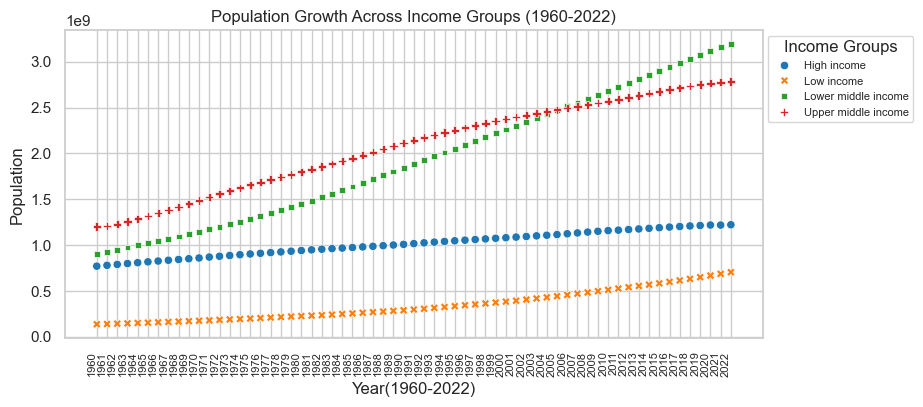

In [6]:
years_columns = merged_df.columns[merged_df.columns.str.isnumeric()]
grouped_df = merged_df.groupby('IncomeGroup')[years_columns].sum()

# Transpose the DataFrame for easier plotting
grouped_df = grouped_df.transpose()

# Set Seaborn style
sns.set(style="whitegrid")

# Calculate the percent growth for each region from 1960 to 2022
percent_growth = (grouped_df.iloc[-1] - grouped_df.iloc[0]) / grouped_df.iloc[0] * 100

# Plot population growth for each income group over the years using a line plot
plt.figure(figsize=(9, 4))

# Plot all income groups with a common style
sns.scatterplot(data=grouped_df, palette="tab10")

plt.title('Population Growth Across Income Groups (1960-2022)')
plt.xlabel('Year(1960-2022)')
plt.ylabel('Population')
plt.legend(title='Income Groups', loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.show()



The above line graph shows the growth trend of lower middle income group to be higher than other groups

Now we will also check the population distribution among these groups with the help of pie charts

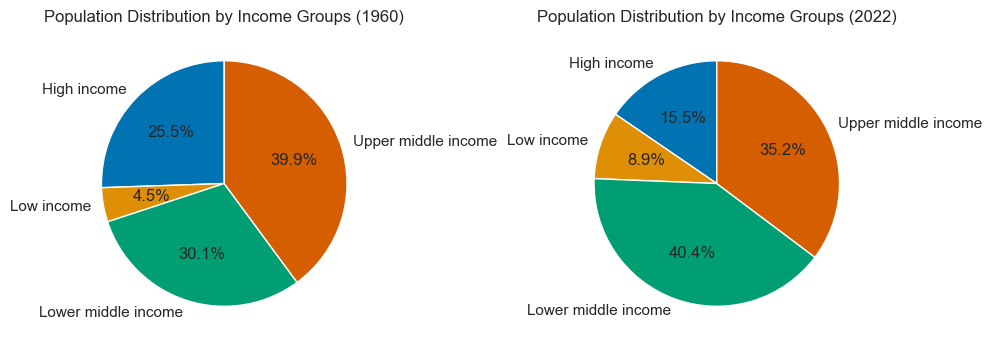

The Population proportion of Low Income and Lower middle Income groups has increased over the years


In [62]:
# Select relevant columns
columns_of_interest = ['IncomeGroup', '1960', '2022']
data_subset = merged_df[columns_of_interest]

# Melt the dataframe to convert it to a long format for plotting
melted_data = pd.melt(data_subset, id_vars='IncomeGroup', var_name='Year', value_name='Population')

# Create separate pie charts for 1960 and 2022
plt.figure(figsize=(10, 6))

# Pie chart for 1960
plt.subplot(1, 2, 1)
population_1960 = melted_data[melted_data['Year'] == '1960'].groupby('IncomeGroup')['Population'].sum()
plt.pie(population_1960, labels=population_1960.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('colorblind'))
plt.title('Population Distribution by Income Groups (1960)')

# Pie chart for 2022
plt.subplot(1, 2, 2)
population_2022 = melted_data[melted_data['Year'] == '2022'].groupby('IncomeGroup')['Population'].sum()
plt.pie(population_2022, labels=population_2022.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('colorblind'))
plt.title('Population Distribution by Income Groups (2022)')

plt.tight_layout()
plt.show()

print('The Population proportion of Low Income and Lower middle Income groups has increased over the years')

Now let's check the top 10 groups with highest population

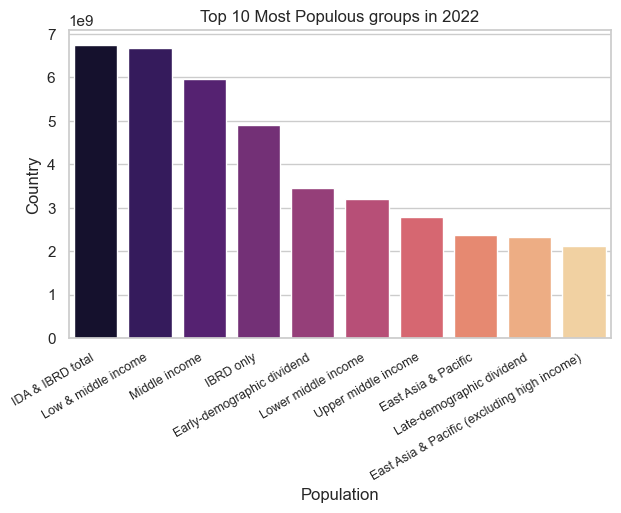

In [30]:
# List of countries to ignore
countries_to_ignore = ['World']

# Filter data for the year 2022, excluding specified countries
filtered_df = merged_df[~merged_df['Country Name'].isin(countries_to_ignore)]
sorted_population_desc = filtered_df.sort_values(by='2022', ascending=False)

# Select the top 10 most populous countries
top_10_most_populous = sorted_population_desc.head(10)

# Select the top 10 least populous countries
top_10_least_populous = sorted_population_desc.tail(10)

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting the top 10 most populous countries
plt.figure(figsize=(7, 4))
sns.barplot(x='Country Name', y='2022', data=top_10_most_populous, palette='magma')
plt.title('Top 10 Most Populous groups in 2022')
plt.xlabel('Population')
plt.ylabel('Country')
plt.xticks(rotation=30, ha='right', fontsize=9)
plt.show()

In the above figure IDA(International Development Agency) and IBRD(International bank for reconstruction and development) are financial groups representing the total population of total member countries of these international organizations

Now let's check the relation between the Regions and Income Groups which are categorical variables with the help of a heat mab

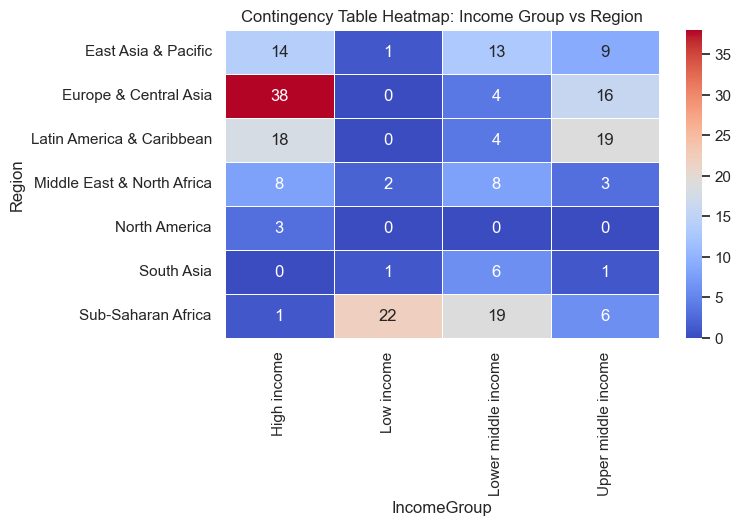

In [53]:
# Extract the relevant columns
subset_columns = ['IncomeGroup', 'Region']
subset_df = merged_df[subset_columns]

# Create a contingency table using pd.crosstab
contingency_table = pd.crosstab(subset_df['Region'], subset_df['IncomeGroup'])

# Plot the heatmap of the contingency table
plt.figure(figsize=(7, 4))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', linewidths=.5)
plt.title('Contingency Table Heatmap: Income Group vs Region')
plt.show()


The above heat map shows that Europe and Central Asia have highest number of High Income countries whereas south asia has no high income country, Sub-Saharan Africa has maximum number of Low Income countries 

# Possible Reasons Behind Population Growth Variations

The population growth in low-income and lower-income countries may be on account of various reasons like Economic challenges and poverty which contribute to a lack of access to family planning resources and healthcare, resulting in higher population growth, Agricultural Practices in many low-income countries, where agriculture is a significant part of the economy, larger families may be seen as an asset for farm labor, Cultural and socioeconomic factors influencing high fertility rates in low-income countries may contribute to population growth.

A stagnant or slower population growth in high income countries could be because of better access to family planning, education and career opportunities for women often correlate with delayed marriages and childbearing, government policies like Some high-income countries implement policies that support work-life balance, family planning, and parental leave

Both IBRD and IDA have a broad membership base, encompassing countries from various regions and income levels. The combined membership contributes to a larger overall population within these groups.The IDA provides concessional financing and the IBRD focuses on middle income countries which often have large populations

# Conclusion

In summary, the World Bank population data analysis reveals a global linear growth trend, with Sub-Saharan Africa experiencing the highest population growth and Europe and Central Asia the lowest. Noteworthy are the anomalies among countries like Dominica, Ukraine and Guyana and the elevated growth rates in low-income and lower-middle-income nations. The IDA and IBRD population group stands out as the most populous. Additionally, the comparison of population distribution proportions in 2022 and 1960 provides valuable historical context, emphasizing the need for nuanced interventions to address the diverse challenges posed by global population dynamics.